### Problem Statment - Using the Logistic Regression
The problem statement is that we have Lead conversion data generated from the source and the company current has around 30% conversion rate and we need to identify parameters that increase the conversion rate to 80% from this data using logisctice regression - by identifying hot leads and then assigning proper score to them based on probability percentage

Using this we can reduce the effort of sales team by simply focusing on these hot leads and increase conversion rate

### Read the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings 
warnings.filterwarnings('ignore')

In [2]:
leadData = pd.read_csv("C:/Users/raskumar0/OneDrive - Publicis Groupe/Documents/Learnings and Certifications/IIIT B- Certification/Logistic Regression Case Study/Lead Scoring Assignment/Leads.csv")
#leadData = pd.read_csv("Leads.csv")
leadData.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
leadData.shape

(9240, 37)

In [4]:
leadData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
leadData.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Identifying columns with "Select" as column value

In [6]:
leadData['How did you hear about X Education'].value_counts(normalize=True)*100

#This we need to replace with null as we cannot guess how the person heard about it

Select                   71.704820
Online Search            11.488696
Word Of Mouth             4.948102
Student of SomeSchool     4.407792
Other                     2.644675
Multiple Sources          2.161240
Advertisements            0.995308
Social Media              0.952652
Email                     0.369686
SMS                       0.327030
Name: How did you hear about X Education, dtype: float64

In [7]:
leadData['Specialization'].value_counts()

#This we need to replace select with not mentioned

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [8]:
leadData['Lead Profile'].value_counts()
#Here again we need to replace select with Not Mentioned

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [9]:
leadData['City'].value_counts()
#Let us remove city columns and for select we can replace this one with Nan

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

### Replacing all other select with Null values

In [10]:
leadData = leadData.replace('Select', np.nan)

### Checking for null values

In [11]:
a=(leadData.isnull().sum()/len(leadData))*100
a

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

### Deleting all columns with null values > 40%

In [12]:
leadData1 = leadData.loc[:, (leadData.isnull().sum()/len(leadData)*100) <= 39.00]

In [13]:
(leadData1.isnull().sum()/len(leadData1))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

### Checking for Imbalanced Data and dropping these columns

In [14]:
leadData1['Search'].value_counts(normalize=True)*100

No     99.848485
Yes     0.151515
Name: Search, dtype: float64

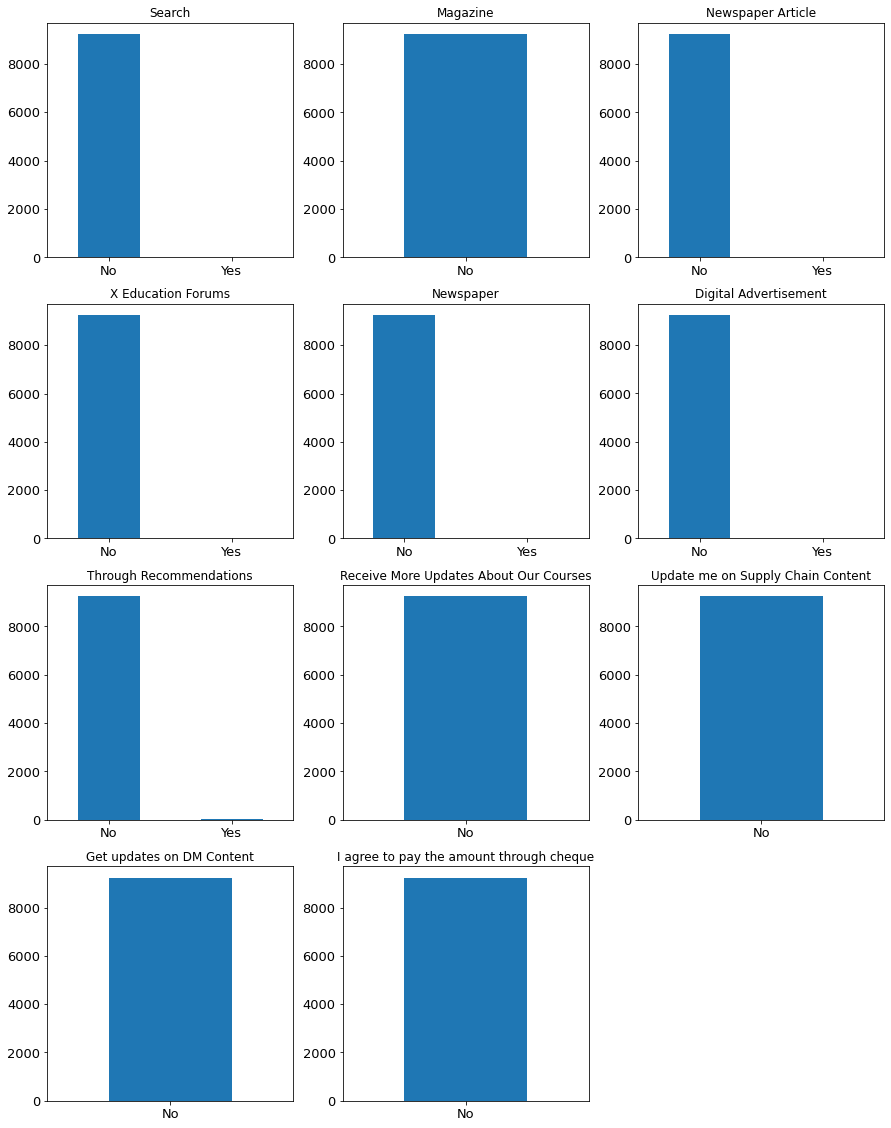

In [15]:
plt.figure(figsize=(15,25))
plt.subplot(5,3,1)
leadData1.Search.value_counts().plot(kind='bar',title='Search')
plt.xticks(rotation=0, fontsize=13)
plt.yticks(rotation=0, fontsize=13)

plt.subplot(5,3,2)
leadData1.Magazine.value_counts().plot(kind='bar',title='Magazine')
plt.xticks(rotation=0, fontsize=13)
plt.yticks(rotation=0, fontsize=13)

plt.subplot(5,3,3)
leadData1['Newspaper Article'].value_counts().plot(kind='bar',title='Newspaper Article')
plt.xticks(rotation=0, fontsize=13)
plt.yticks(rotation=0, fontsize=13)


plt.subplot(5,3,4)
leadData1['X Education Forums'].value_counts().plot(kind='bar',title='X Education Forums')
plt.xticks(rotation=0, fontsize=13)
plt.yticks(rotation=0, fontsize=13)


plt.subplot(5,3,5)
leadData1['Newspaper'].value_counts().plot(kind='bar',title='Newspaper')
plt.xticks(rotation=0, fontsize=13)
plt.yticks(rotation=0, fontsize=13)

plt.subplot(5,3,6)
leadData1['Digital Advertisement'].value_counts().plot(kind='bar',title='Digital Advertisement')
plt.xticks(rotation=0, fontsize=13)
plt.yticks(rotation=0, fontsize=13)

plt.subplot(5,3,7)
leadData1['Through Recommendations'].value_counts().plot(kind='bar',title='Through Recommendations')
plt.xticks(rotation=0, fontsize=13)
plt.yticks(rotation=0, fontsize=13)

plt.subplot(5,3,8)
leadData1['Receive More Updates About Our Courses'].value_counts().plot(kind='bar',title='Receive More Updates About Our Courses')
plt.xticks(rotation=0, fontsize=13)
plt.yticks(rotation=0, fontsize=13)

plt.subplot(5,3,9)
leadData1['Update me on Supply Chain Content'].value_counts().plot(kind='bar',title='Update me on Supply Chain Content')
plt.xticks(rotation=0, fontsize=13)
plt.yticks(rotation=0, fontsize=13)

plt.subplot(5,3,10)
leadData1['Get updates on DM Content'].value_counts().plot(kind='bar',title='Get updates on DM Content')
plt.xticks(rotation=0, fontsize=13)
plt.yticks(rotation=0, fontsize=13)



plt.subplot(5,3,11)
leadData1['I agree to pay the amount through cheque'].value_counts().plot(kind='bar',title='I agree to pay the amount through cheque')
plt.xticks(rotation=0, fontsize=13)
plt.yticks(rotation=0, fontsize=13)

plt.show()

Delete all above columns as the data in them are skewed and of no significance to the model

and removing the remaining columns which are generated by sales team like - 'Last Activity','Tags','Last Notable Activity'

In [16]:
dropColumns = ['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
               'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
               'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
               'Prospect ID','Lead Number','Last Activity','Tags','Last Notable Activity'
]



In [17]:
len(dropColumns)

#16 columns to be dropped

16

In [18]:
leadData3 = leadData1.drop(dropColumns, axis=1)

In [19]:
leadData3.shape

(9240, 13)

### Imputing the other remainder columns with null values

In [20]:
(leadData3.isnull().sum()/len(leadData3))*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
A free copy of Mastering The Interview            0.000000
dtype: float64

In [21]:
#Imputation of categorical columns using mode
leadData3['Country'] = leadData3['Country'].fillna(leadData3['Country'].mode()[0])
leadData3['Specialization'] = leadData3['Specialization'].fillna(leadData3['Specialization'].mode()[0])
leadData3['What is your current occupation'] = leadData3['What is your current occupation'].fillna(leadData3['What is your current occupation'].mode()[0])
leadData3['What matters most to you in choosing a course'] = leadData3['What matters most to you in choosing a course'].fillna(leadData3['What matters most to you in choosing a course'].mode()[0])
#leadData3['Tags'] = leadData3['Tags'].fillna(leadData3['Tags'].mode()[0])

#Imputation of numerical columns using mode

# We are using mode as demonstrated below that due to outliers the average is skewed to  a higher number and hence 
# we are using the most commonly appearing data to impute

leadData3['TotalVisits'] = leadData3['TotalVisits'].fillna(leadData3['TotalVisits'].mode()[0])


leadData3['Page Views Per Visit'] = leadData3['Page Views Per Visit'].fillna(leadData3['Page Views Per Visit'].mode()[0])

In [22]:
leadData3['Page Views Per Visit'].mean()

2.3277867965367975

In [23]:
leadData3['Page Views Per Visit'].value_counts(normalize=True)*100

0.00    25.173160
2.00    19.426407
3.00    12.943723
4.00     9.696970
1.00     7.045455
          ...    
1.27     0.010823
8.21     0.010823
2.14     0.010823
2.63     0.010823
2.45     0.010823
Name: Page Views Per Visit, Length: 114, dtype: float64

In [24]:
leadData3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Country                                        9240 non-null   object 
 9   Specialization                                 9240 

In [25]:
(leadData3.isnull().sum()/len(leadData3))*100

Lead Origin                                      0.00000
Lead Source                                      0.38961
Do Not Email                                     0.00000
Do Not Call                                      0.00000
Converted                                        0.00000
TotalVisits                                      0.00000
Total Time Spent on Website                      0.00000
Page Views Per Visit                             0.00000
Country                                          0.00000
Specialization                                   0.00000
What is your current occupation                  0.00000
What matters most to you in choosing a course    0.00000
A free copy of Mastering The Interview           0.00000
dtype: float64

### Converting some Binary vars (yes/no) to (1/0)

In [26]:
varlist =  ['A free copy of Mastering The Interview','Do Not Email','Do Not Call']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leadData3[varlist] = leadData3[varlist].apply(binary_map)

### Deleting rows with less values from dataset

In [27]:
# dropping rows from column "Lead Origin" having value "Quick Add Form" as there is only one such entry which is negligible
leadData3.drop(leadData3[leadData3['Lead Origin'] == 'Quick Add Form'].index, inplace = True)

# dropping rows from column "Lead Source" where value counts are relatively less
leadData3 = leadData3[~leadData3['Lead Source'].isin(leadData3['Lead Source'].value_counts()[leadData3['Lead Source'].value_counts() <55].index)]

# dropping rows from column "Last Activity" where value counts are relatively less
#leadData3 = leadData3[~leadData3['Last Notable Activity'].isin(leadData3['Last Notable Activity'].value_counts()[leadData3['Last Notable Activity'].value_counts() <173].index)]
leadData3 = leadData3[~leadData3['Country'].isin(leadData3['Country'].value_counts()[leadData3['Country'].value_counts() <10].index)]

leadData3 = leadData3.dropna(subset=['Lead Source'])


In [28]:
#leadData3 = leadData3[~leadData3['Tags'].isin(leadData3['Tags'].value_counts()[leadData3['Tags'].value_counts() <100].index)]

In [29]:
leadData3['Lead Origin'].value_counts()

Landing Page Submission    4806
API                        3556
Lead Add Form               679
Lead Import                  54
Name: Lead Origin, dtype: int64

In [30]:
leadData3['Country'].value_counts()

India                   8890
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Name: Country, dtype: int64

In [31]:
leadData3['Specialization'].value_counts()

Finance Management                   4295
Human Resource Management             835
Marketing Management                  821
Operations Management                 494
Business Administration               394
IT Projects Management                363
Supply Chain Management               340
Banking, Investment And Insurance     336
Media and Advertising                 201
Travel and Tourism                    199
International Business                171
Healthcare Management                 156
Hospitality Management                113
E-COMMERCE                            109
Retail Management                      99
Rural and Agribusiness                 72
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [32]:
leadData3['Lead Source'].value_counts()

Google              2852
Direct Traffic      2493
Olark Chat          1754
Organic Search      1142
Reference            534
Welingak Website     142
Referral Sites       123
Facebook              55
Name: Lead Source, dtype: int64

In [33]:
leadData3['What is your current occupation'].value_counts()

Unemployed              8155
Working Professional     698
Student                  208
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [34]:
leadData3['What matters most to you in choosing a course'].value_counts()


Better Career Prospects      9092
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [35]:
leadData3['What is your current occupation'].value_counts()

Unemployed              8155
Working Professional     698
Student                  208
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [36]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leadData3[['Lead Origin','Lead Source','Specialization',
                                   'What is your current occupation','What matters most to you in choosing a course',
                         'Country',]], drop_first=True)


# Adding the results to the master dataframe
leadData3 = pd.concat([leadData3, dummy1], axis=1)

In [37]:
leadData3.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,...,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Country_India,Country_Qatar,Country_Saudi Arabia,Country_Singapore,Country_United Arab Emirates,Country_United Kingdom,Country_United States
0,API,Olark Chat,0,0,0,0.0,0,0.0,India,Finance Management,...,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,India,Finance Management,...,0,0,0,1,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,India,Business Administration,...,0,0,0,1,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,India,Media and Advertising,...,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,India,Finance Management,...,0,0,0,1,0,0,0,0,0,0


In [38]:
leadData3.shape

(9095, 54)

In [39]:
leadData3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9095 entries, 0 to 9238
Data columns (total 54 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Lead Origin                                                              9095 non-null   object 
 1   Lead Source                                                              9095 non-null   object 
 2   Do Not Email                                                             9095 non-null   int64  
 3   Do Not Call                                                              9095 non-null   int64  
 4   Converted                                                                9095 non-null   int64  
 5   TotalVisits                                                              9095 non-null   float64
 6   Total Time Spent on Website                                             

In [40]:
dropDummy = ['Lead Origin','Lead Source','Specialization',
                                   'What is your current occupation','What matters most to you in choosing a course'
                           ,'Country'
]

lead = leadData3.drop(dropDummy, axis=1)

In [41]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9095 entries, 0 to 9238
Data columns (total 48 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Do Not Email                                                             9095 non-null   int64  
 1   Do Not Call                                                              9095 non-null   int64  
 2   Converted                                                                9095 non-null   int64  
 3   TotalVisits                                                              9095 non-null   float64
 4   Total Time Spent on Website                                              9095 non-null   int64  
 5   Page Views Per Visit                                                     9095 non-null   float64
 6   A free copy of Mastering The Interview                                  

In [42]:
num_lead = lead[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

num_lead.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9095.000000,9095.000000,9095.000000
mean,3.399230,488.390434,2.330518
std,4.854394,548.581844,2.156599
min,0.000000,0.000000,0.000000
25%,0.000000,12.000000,0.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,938.000000,3.000000
90%,7.000000,1381.000000,5.000000
95%,10.000000,1563.000000,6.000000
99%,17.000000,1841.120000,9.000000


<AxesSubplot:xlabel='Page Views Per Visit'>

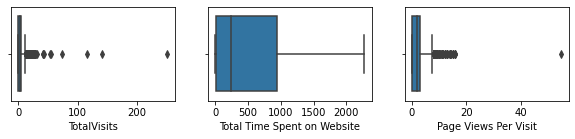

In [43]:
plt.figure(figsize=(10,10))
plt.subplot(5,3,1)
sns.boxplot(x= lead.TotalVisits)
# #leadData3.Search.value_counts().plot(kind='bar',title='Search')

plt.subplot(5,3,2)
sns.boxplot(x= lead['Total Time Spent on Website'])

plt.subplot(5,3,3)
sns.boxplot(x= lead['Page Views Per Visit'])


In [44]:
lead.TotalVisits.sort_values(ascending = False)


6102    251.0
2322    141.0
5608    115.0
5283     74.0
2190     55.0
        ...  
4371      0.0
4365      0.0
4359      0.0
4357      0.0
0         0.0
Name: TotalVisits, Length: 9095, dtype: float64

In [45]:
#lead['TotalVisits'] = lead[lead['TotalVisits']< 75]

<AxesSubplot:xlabel='Page Views Per Visit'>

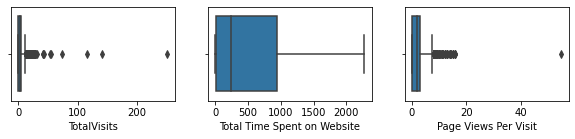

In [46]:
plt.figure(figsize=(10,10))
plt.subplot(5,3,1)
sns.boxplot(x= lead.TotalVisits)
# #leadData3.Search.value_counts().plot(kind='bar',title='Search')

plt.subplot(5,3,2)
sns.boxplot(x= lead['Total Time Spent on Website'])

plt.subplot(5,3,3)
sns.boxplot(x= lead['Page Views Per Visit'])


In [47]:
lead = lead[~(lead['TotalVisits'] > 20)]


In [48]:
lead = lead[~(lead['Page Views Per Visit'] > 9)]

<AxesSubplot:xlabel='Page Views Per Visit'>

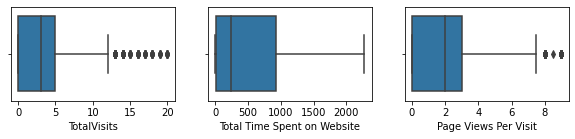

In [49]:
plt.figure(figsize=(10,10))
plt.subplot(5,3,1)
sns.boxplot(x= lead.TotalVisits)
# #leadData3.Search.value_counts().plot(kind='bar',title='Search')

plt.subplot(5,3,2)
sns.boxplot(x= lead['Total Time Spent on Website'])

plt.subplot(5,3,3)
sns.boxplot(x= lead['Page Views Per Visit'])

In [50]:
lead.TotalVisits.sort_values(ascending = False)

7332    20.0
7092    20.0
7720    20.0
5193    20.0
1115    20.0
        ... 
2768     0.0
2767     0.0
2765     0.0
2764     0.0
0        0.0
Name: TotalVisits, Length: 8983, dtype: float64

### Step 4: Test-Train Split

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X = lead.drop(['Converted'], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,...,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Country_India,Country_Qatar,Country_Saudi Arabia,Country_Singapore,Country_United Arab Emirates,Country_United Kingdom,Country_United States
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [53]:
y = lead['Converted']

y.head()   

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [54]:
X_train,X_test, y_train, y_test = train_test_split(X,y,stratify=y)

### Feature Scaling

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
scaler = StandardScaler()

X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']] = scaler.fit_transform(X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])
X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']] = scaler.fit_transform(X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,...,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Country_India,Country_Qatar,Country_Saudi Arabia,Country_Singapore,Country_United Arab Emirates,Country_United Kingdom,Country_United States
3778,0,0,1.261060,0.953650,0.045320,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
962,0,0,0.276805,1.054611,-0.128164,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1086,0,0,-0.051280,0.702167,0.397545,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5399,0,0,-1.035535,-0.887504,-1.179581,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4255,0,0,1.261060,-0.637856,0.660399,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### Checking the Churn Rate

In [57]:
conversionRate =  sum(lead['Converted']/len(lead['Converted'].index))*100
conversionRate 

38.428142046089064

### Looking at Correlations

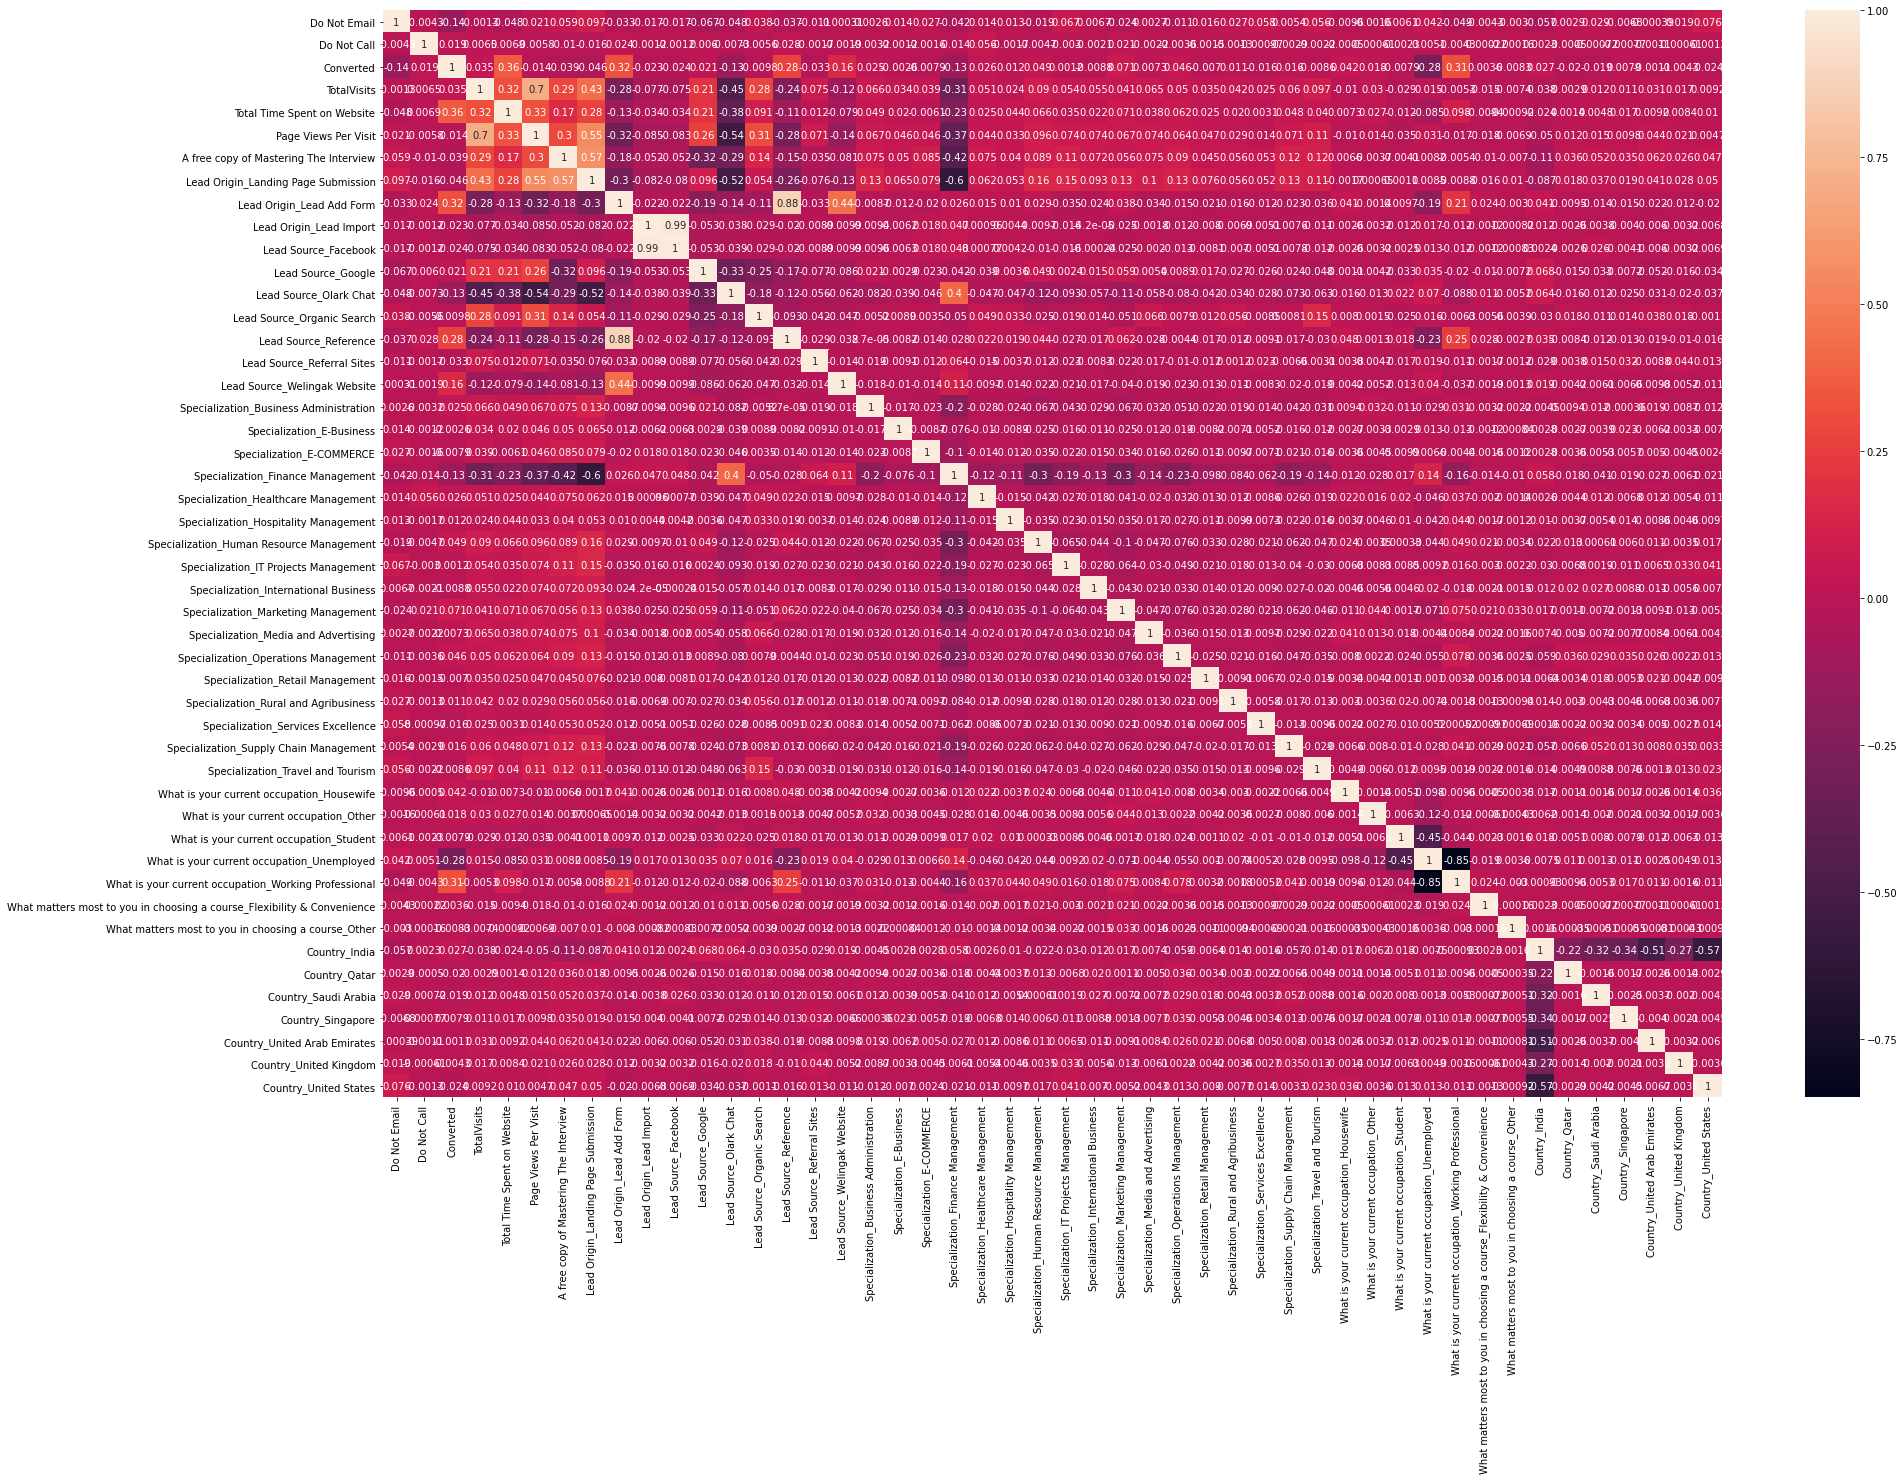

In [58]:
plt.figure(figsize=(30,20))
sns.heatmap(lead.corr(), annot=True)
plt.show()

### Taking the top columns that are correlated to each other and then removing these columns

In [59]:
T11_CR = lead.corr().unstack()
T11_CR.sort_values(ascending=False).drop_duplicates().head(11)

Country_United States                   Country_United States                  1.000000
Lead Origin_Lead Import                 Lead Source_Facebook                   0.990812
Lead Source_Reference                   Lead Origin_Lead Add Form              0.879003
TotalVisits                             Page Views Per Visit                   0.701072
A free copy of Mastering The Interview  Lead Origin_Landing Page Submission    0.567328
Lead Origin_Landing Page Submission     Page Views Per Visit                   0.545841
Lead Source_Welingak Website            Lead Origin_Lead Add Form              0.443556
Lead Origin_Landing Page Submission     TotalVisits                            0.432333
Lead Source_Olark Chat                  Specialization_Finance Management      0.403144
Total Time Spent on Website             Converted                              0.362900
                                        Page Views Per Visit                   0.328311
dtype: float64

In [60]:
dropCorrelated = ['A free copy of Mastering The Interview','Lead Origin_Landing Page Submission',
                  'Lead Source_Welingak Website','Lead Origin_Lead Import',
                  'Page Views Per Visit','What is your current occupation_Unemployed',
                  'Country_United States','Country_United Arab Emirates'
                 ]

In [61]:
lead.columns

Index(['Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specializa

In [62]:
X_test = X_test.drop( dropCorrelated, 1)
X_train = X_train.drop(dropCorrelated, 1)


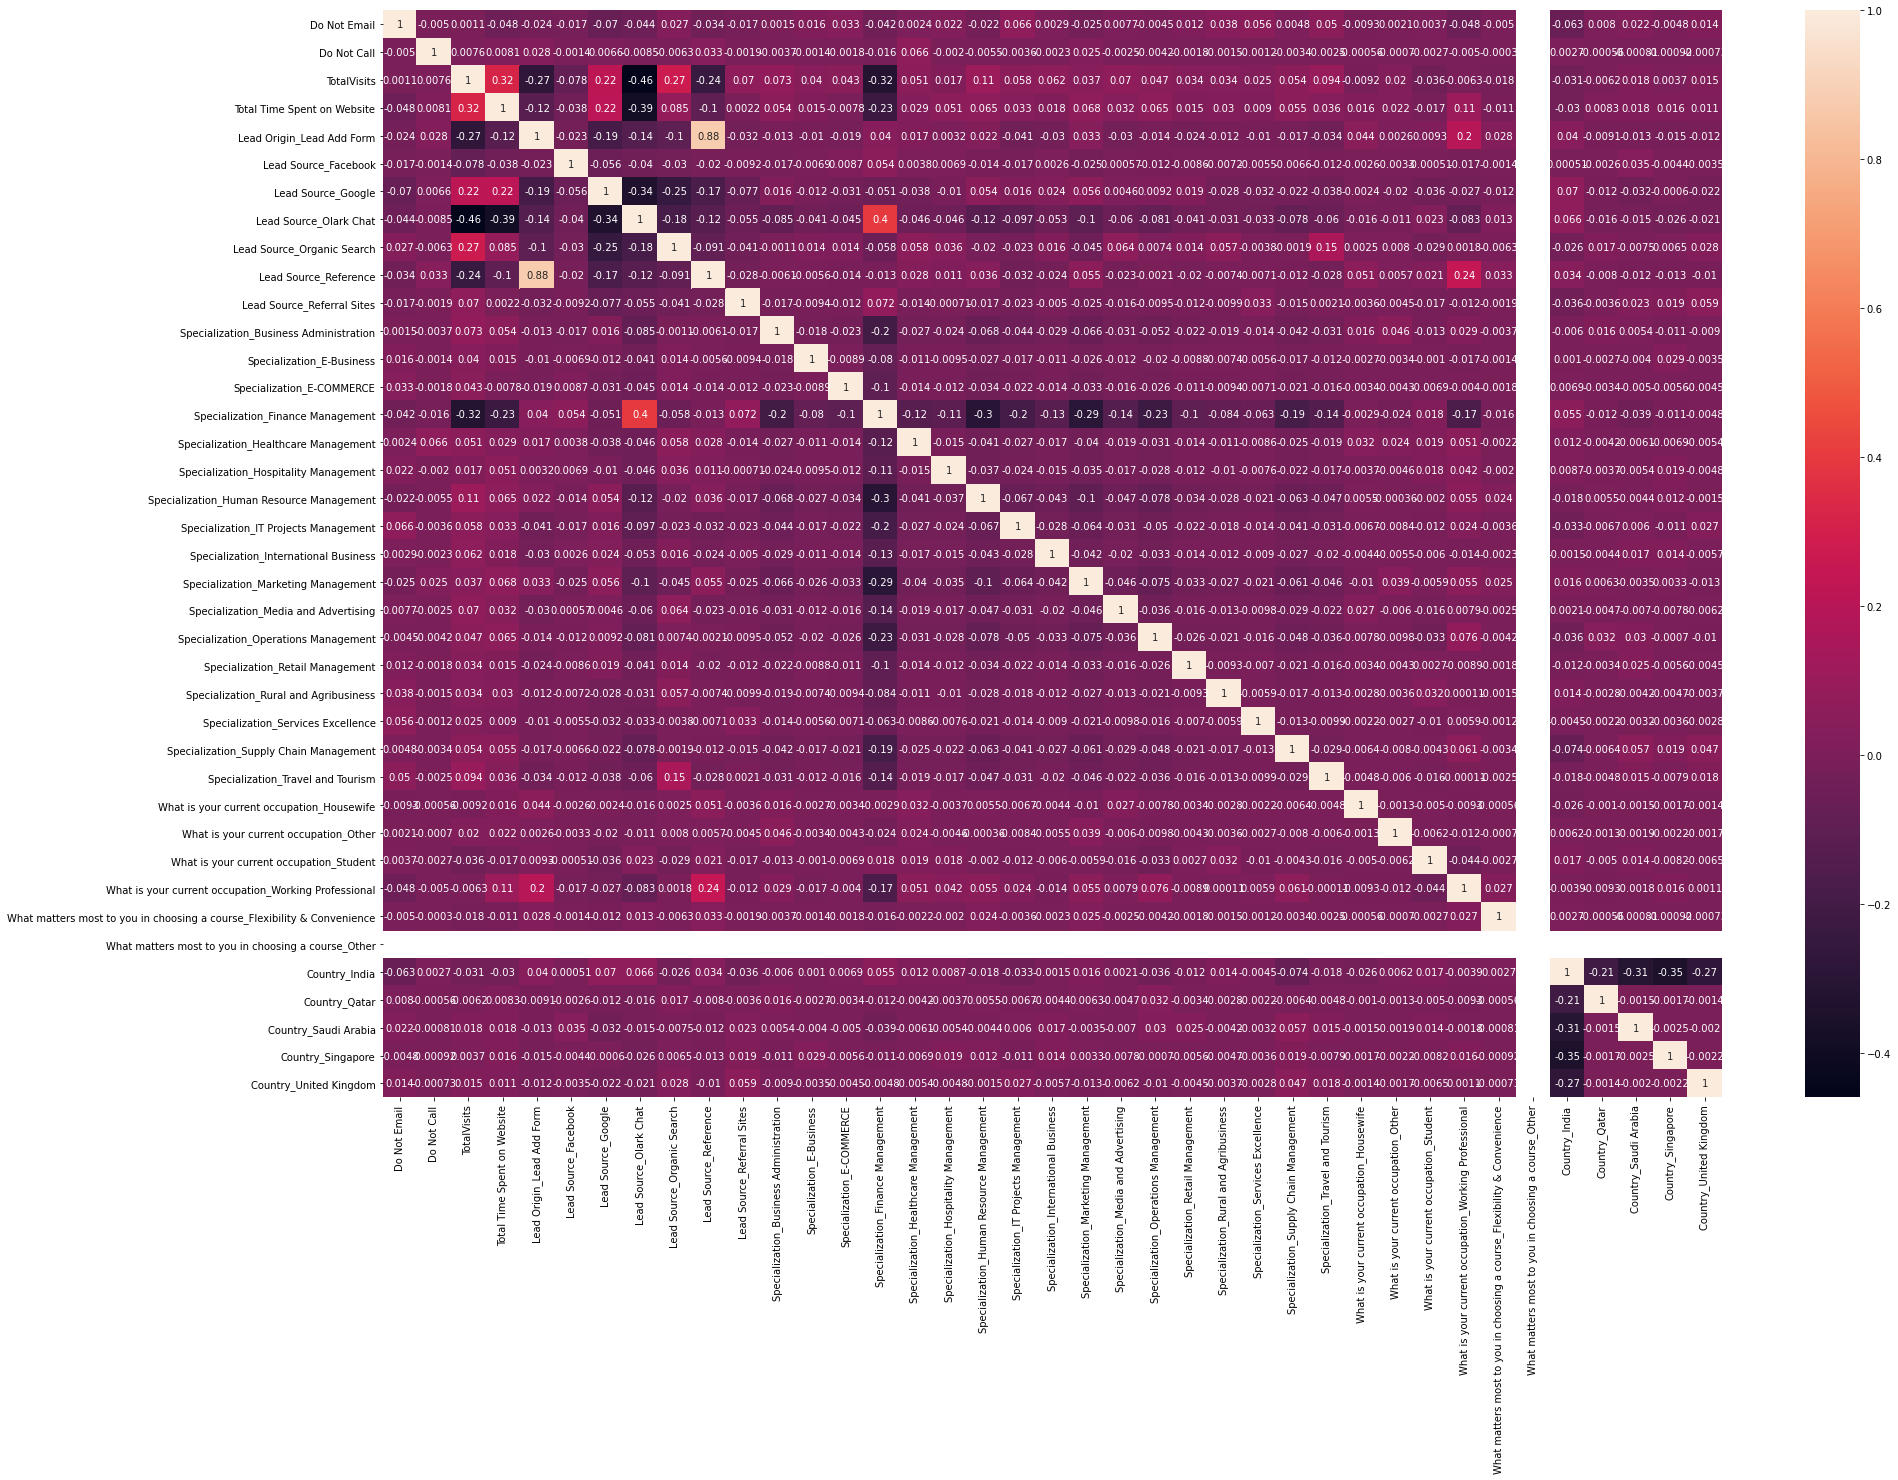

In [63]:
plt.figure(figsize=(30,20))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

### Model Building

In [64]:
import statsmodels.api as sm

In [65]:
#Logistic Regression Model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())

logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6737
Model:                            GLM   Df Residuals:                     6698
Model Family:                Binomial   Df Model:                           38
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3140.0
Date:                Sun, 16 May 2021   Deviance:                       6280.0
Time:                        13:33:03   Pearson chi2:                 8.17e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      -0.9105      0.319     -2.856      0.004      -1.535      -0.286
Do Not Email                                                               -1.3301      0.157     -8.464      0.000      -1.638      -1.022
Do Not Call                                                                20.7629   3.37e+04      0.001      1.000    -6.6e+04    6.61e+04
TotalVisits                                                                 0.1359      0.039      3.464      0.001       0.059       0.213
Total Time Spent on Website                                                 1.1088      0.037     29.678      0.000       1.036       1.182
Lead Origin_Lead Add Form                                                   6.3140      0.602     10.484      0.000       5.134       7.494
Lead Source_Facebook                                                        0.3424      0.453      0.756      0.449      -0.545       1.230
Lead Source_Google                                                          0.3053      0.084      3.649      0.000       0.141       0.469
Lead Source_Olark Chat                                                      1.4062      0.121     11.654      0.000       1.170       1.643
Lead Source_Organic Search                                                  0.1916      0.113      1.695      0.090      -0.030       0.413
Lead Source_Reference                                                      -2.0111      0.624     -3.222      0.001      -3.234      -0.788
Lead Source_Referral Sites                                                 -0.2413      0.331     -0.729      0.466      -0.890       0.407
Specialization_Business Administration                                     -0.3756      0.218     -1.726      0.084      -0.802       0.051
Specialization_E-Business                                                  -0.5620      0.403     -1.395      0.163      -1.352       0.228
Specialization_E-COMMERCE                                                  -0.2407      0.336     -0.717      0.474      -0.899       0.418
Specialization_Finance Management                                          -0.8289      0.169     -4.914      0.000      -1.159      -0.498
Specialization_Healthcare Management                                       -0.3689      0.293     -1.260      0.208      -0.943       0.205
Specialization_Hospitality Management                                      -1.0336      0.329     -3.140      0.002      -1.679      -0.388
Specialization_Human Resource Management                                   -0.4716      0.187     -2.517      0.012      -0.839      -0.104
Spe

In [66]:
### Dropping columns having high probability

In [67]:
ctd1 = ['What matters most to you in choosing a course_Other',
        'What matters most to you in choosing a course_Flexibility & Convenience',
        'Do Not Call']

X_train.drop(ctd1,axis=1,inplace=True)

In [68]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())

logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6737
Model:                            GLM   Df Residuals:                     6700
Model Family:                Binomial   Df Model:                           36
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3140.6
Date:                Sun, 16 May 2021   Deviance:                       6281.2
Time:                        13:33:04   Pearson chi2:                 8.34e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9107      0.319     -2.856      0.004      -1.536      -0.286
Do Not Email                                            -1.3303      0.157     -8.465      0.000      -1.638      -1.022
TotalVisits                                              0.1364      0.039      3.477      0.001       0.060       0.213
Total Time Spent on Website                              1.1091      0.037     29.689      0.000       1.036       1.182
Lead Origin_Lead Add Form                                6.3145      0.602     10.485      0.000       5.134       7.495
Lead Source_Facebook                                     0.3424      0.453      0.756      0.449      -0.545       1.230
Lead Source_Google                                       0.3057      0.084      3.654      0.000       0.142       0.470
Lead Source_Olark Chat                                   1.4054      0.121     11.652      0.000       1.169       1.642
Lead Source_Organic Search                               0.1910      0.113      1.690      0.091      -0.031       0.413
Lead Source_Reference                                   -2.0083      0.624     -3.218      0.001      -3.232      -0.785
Lead Source_Referral Sites                              -0.2419      0.331     -0.731      0.465      -0.890       0.407
Specialization_Business Administration                  -0.3756      0.218     -1.726      0.084      -0.802       0.051
Specialization_E-Business                               -0.5621      0.403     -1.395      0.163      -1.352       0.228
Specialization_E-COMMERCE                               -0.2405      0.336     -0.716      0.474      -0.899       0.418
Specialization_Finance Management                       -0.8282      0.169     -4.910      0.000      -1.159      -0.498
Specialization_Healthcare Management                    -0.3622      0.292     -1.240      0.215      -0.935       0.210
Specialization_Hospitality Management                   -1.0335      0.329     -3.139      0.002      -1.679      -0.388
Specialization_Human Resource Management                -0.4721      0.187     -2.520      0.012      -0.839      -0.105
Specialization_IT Projects Management                   -0.2792      0.222     -1.257      0.209      -0.715       0.156
Specialization_International Business                   -0.3178      0.273     -1.163      0.245      -0.853       0.218
Specialization_Marketing Management                     -0.3200      0.189     -1.694      0.090      -0.690       0.050
Specialization_Media and Advertising                    -0.5456      0.264     -2.071      0.038      -1.062      -0.029
Specialization_Operations Management                    -0

In [69]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)
rfe.support_
list(zip(X_train.columns, rfe.support_, rfe.ranking_))
col = X_train.columns[rfe.support_ == True]
X_train = X_train[col]

In [70]:
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Specialization_Finance Management',
       'Specialization_Hospitality Management',
       'Specialization_Services Excellence',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional', 'Country_India',
       'Country_Qatar', 'Country_Saudi Arabia'],
      dtype='object')

In [71]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())

logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6737
Model:                            GLM   Df Residuals:                     6721
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3159.6
Date:                Sun, 16 May 2021   Deviance:                       6319.2
Time:                        13:33:08   Pearson chi2:                 8.41e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1735      0.239     -4.907      0.000      -1.642      -0.705
Do Not Email                                            -1.3848      0.156     -8.871      0.000      -1.691      -1.079
Total Time Spent on Website                              1.1165      0.037     30.162      0.000       1.044       1.189
Lead Origin_Lead Add Form                                5.9583      0.598      9.957      0.000       4.785       7.131
Lead Source_Olark Chat                                   1.0523      0.097     10.884      0.000       0.863       1.242
Lead Source_Reference                                   -2.0110      0.625     -3.220      0.001      -3.235      -0.787
Lead Source_Referral Sites                              -0.4076      0.325     -1.253      0.210      -1.045       0.230
Specialization_Finance Management                       -0.4585      0.071     -6.434      0.000      -0.598      -0.319
Specialization_Hospitality Management                   -0.6647      0.289     -2.296      0.022      -1.232      -0.097
Specialization_Services Excellence                      -0.8790      0.560     -1.568      0.117      -1.978       0.220
What is your current occupation_Housewife               21.7332   1.65e+04      0.001      0.999   -3.23e+04    3.23e+04
What is your current occupation_Other                    0.2666      0.673      0.396      0.692      -1.052       1.585
What is your current occupation_Working Professional     2.7465      0.177     15.535      0.000       2.400       3.093
Country_India                                            0.3156      0.240      1.316      0.188      -0.154       0.786
Country_Qatar                                           -1.3402      1.360     -0.985      0.324      -4.006       1.326
Country_Saudi Arabia                                    -0.7893      0.781     -1.011      0.312      -2.320       0.741
========================================================================================================================
"""

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif



,Features,VIF
2,Lead Origin_Lead Add Form,4.91
4,Lead Source_Reference,4.80
6,Specialization_Finance Management,2.42
12,Country_India,2.41
3,Lead Source_Olark Chat,1.78
1,Total Time Spent on Website,1.25
11,What is your current occupation_Working Profes...,1.20
0,Do Not Email,1.09
5,Lead Source_Referral Sites,1.03
7,Specialization_Hospitality Management,1.03


In [73]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6737
Model:                            GLM   Df Residuals:                     6721
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3159.6
Date:                Sun, 16 May 2021   Deviance:                       6319.2
Time:                        13:33:08   Pearson chi2:                 8.41e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1735      0.239     -4.907      0.000      -1.642      -0.705
Do Not Email                                            -1.3848      0.156     -8.871      0.000      -1.691      -1.079
Total Time Spent on Website                              1.1165      0.037     30.162      0.000       1.044       1.189
Lead Origin_Lead Add Form                                5.9583      0.598      9.957      0.000       4.785       7.131
Lead Source_Olark Chat                                   1.0523      0.097     10.884      0.000       0.863       1.242
Lead Source_Reference                                   -2.0110      0.625     -3.220      0.001      -3.235      -0.787
Lead Source_Referral Sites                              -0.4076      0.325     -1.253      0.210      -1.045       0.230
Specialization_Finance Management                       -0.4585      0.071     -6.434      0.000      -0.598      -0.319
Specialization_Hospitality Management                   -0.6647      0.289     -2.296      0.022      -1.232      -0.097
Specialization_Services Excellence                      -0.8790      0.560     -1.568      0.117      -1.978       0.220
What is your current occupation_Housewife               21.7332   1.65e+04      0.001      0.999   -3.23e+04    3.23e+04
What is your current occupation_Other                    0.2666      0.673      0.396      0.692      -1.052       1.585
What is your current occupation_Working Professional     2.7465      0.177     15.535      0.000       2.400       3.093
Country_India                                            0.3156      0.240      1.316      0.188      -0.154       0.786
Country_Qatar                                           -1.3402      1.360     -0.985      0.324      -4.006       1.326
Country_Saudi Arabia                                    -0.7893      0.781     -1.011      0.312      -2.320       0.741
========================================================================================================================
"""

In [74]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3778    0.551532
962     0.579222
1086    0.481531
5399    0.221844
4255    0.116244
2907    0.814195
6627    0.602993
7984    0.541883
1993    0.221844
1407    0.691665
dtype: float64

In [75]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.55153212, 0.57922221, 0.48153143, 0.22184382, 0.1162443 ,
       0.81419547, 0.60299346, 0.54188263, 0.22184382, 0.69166497])

### Creating a dataframe with the actual churn flag and the predicted probabilities

In [76]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID
0,1,0.551532,3778
1,1,0.579222,962
2,0,0.481531,1086
3,0,0.221844,5399
4,0,0.116244,4255


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [77]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted
0,1,0.551532,3778,1
1,1,0.579222,962,1
2,0,0.481531,1086,0
3,0,0.221844,5399,0
4,0,0.116244,4255,0


In [78]:
from sklearn import metrics

In [79]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3662  486]
 [ 933 1656]]


In [80]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7893721240908417


In [81]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [82]:
# Let's see the sensitivity/Recall of our logistic regression model
TP / float(TP+FN)

0.6396292004634995

In [83]:
# Let us calculate specificity
TN / float(TN+FP)

0.8828351012536162

In [84]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1171648987463838


In [85]:
# positive predictive value 
print (TP / float(TP+FP))

0.773109243697479


In [86]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7969532100108814


In [87]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [88]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

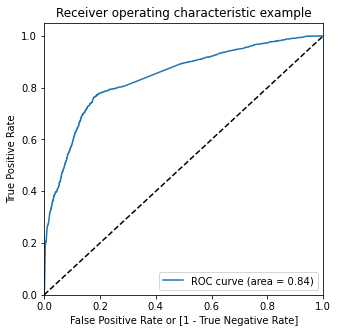

In [89]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

In [90]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.551532,3778,1,1,1,1,1,1,1,0,0,0,0
1,1,0.579222,962,1,1,1,1,1,1,1,0,0,0,0
2,0,0.481531,1086,0,1,1,1,1,1,0,0,0,0,0
3,0,0.221844,5399,0,1,1,1,0,0,0,0,0,0,0
4,0,0.116244,4255,0,1,1,0,0,0,0,0,0,0,0


In [91]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.384296  1.000000  0.000000
0.1   0.1  0.459552  0.988413  0.129460
0.2   0.2  0.633665  0.903824  0.465043
0.3   0.3  0.797091  0.765160  0.817020
0.4   0.4  0.797981  0.699884  0.859209
0.5   0.5  0.789372  0.639629  0.882835
0.6   0.6  0.772302  0.546157  0.913452
0.7   0.7  0.748404  0.437234  0.942623
0.8   0.8  0.730147  0.339513  0.973963
0.9   0.9  0.690812  0.205485  0.993732


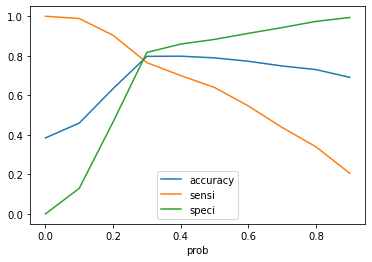

In [92]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [93]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.551532,3778,1,1,1,1,1,1,1,0,0,0,0,1
1,1,0.579222,962,1,1,1,1,1,1,1,0,0,0,0,1
2,0,0.481531,1086,0,1,1,1,1,1,0,0,0,0,0,1
3,0,0.221844,5399,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.116244,4255,0,1,1,0,0,0,0,0,0,0,0,0


In [94]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7970906931868784

In [95]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3389,  759],
       [ 608, 1981]], dtype=int64)

In [96]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [97]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7651602935496331

In [98]:
# Let us calculate specificity
TN / float(TN+FP)

0.8170202507232401

In [99]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1829797492767599


In [100]:
# Positive predictive value 
print (TP / float(TP+FP))

0.722992700729927


In [101]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8478859144358268


In [102]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3662,  486],
       [ 933, 1656]], dtype=int64)

In [103]:
#Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.773109243697479

In [104]:
#Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6396292004634995

### Step 11: Making predictions on the test set

In [105]:
#X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']] = scaler.fit_transform(X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])

In [106]:
X_test = X_test[col]

In [107]:
X_test_sm = sm.add_constant(X_test)

In [108]:
y_test_pred = res.predict(X_test_sm)

In [109]:
y_test_pred[:10]

2665    0.992224
2962    0.891142
4677    0.983233
4539    0.222523
8631    0.378147
1639    0.136487
4833    0.618465
5865    0.040792
6328    0.780625
4666    0.130640
dtype: float64

In [110]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [111]:
y_pred_1.head()

,0
2665,0.992224
2962,0.891142
4677,0.983233
4539,0.222523
8631,0.378147


In [112]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [113]:
# Putting CustID to index
y_test_df['LeadID'] = y_test_df.index

In [114]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [115]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [116]:
y_pred_final.head()

,Converted,LeadID,0
0,1,2665,0.992224
1,1,2962,0.891142
2,1,4677,0.983233
3,1,4539,0.222523
4,0,8631,0.378147


In [117]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [118]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['LeadID','Converted','Converted_Prob'], axis=1)

In [119]:
y_pred_final.head()

,LeadID,Converted,Converted_Prob
0,2665,1,0.992224
1,2962,1,0.891142
2,4677,1,0.983233
3,4539,1,0.222523
4,8631,0,0.378147


In [120]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [121]:
y_pred_final.head()

,LeadID,Converted,Converted_Prob,final_predicted
0,2665,1,0.992224,1
1,2962,1,0.891142,1
2,4677,1,0.983233,1
3,4539,1,0.222523,0
4,8631,0,0.378147,0


In [130]:
# Let's check the overall accuracy.
round(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)*100,2)

79.61

In [123]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1178,  205],
       [ 253,  610]], dtype=int64)

In [124]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [125]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7068366164542295

In [126]:
# Let us calculate specificity
TN / float(TN+FP)

0.8517715112075199

In [127]:
#Conversion =  sum(X_test.co/len(X_test['Converted'].index))*100
#Conversion

In [128]:
X_train.columns

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Specialization_Finance Management',
       'Specialization_Hospitality Management',
       'Specialization_Services Excellence',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional', 'Country_India',
       'Country_Qatar', 'Country_Saudi Arabia'],
      dtype='object')

In [129]:
X_test.columns

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Specialization_Finance Management',
       'Specialization_Hospitality Management',
       'Specialization_Services Excellence',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional', 'Country_India',
       'Country_Qatar', 'Country_Saudi Arabia'],
      dtype='object')

### Final Observation:

#### Train Data: 
Accuracy : 79.70% <br>
Sensitivity : 76.51% <br>
Specificity : 81.70% <br>


#### Test Data: 
Accuracy : 79.61% <br>
Sensitivity : 70.68% <br>
Specificity : 85.17% <br>

##### The model seems to predict the conversion rate very well